In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy import signal

In [6]:
# Load the original speech signal
sample_rate, audio_data = wavfile.read('/content/1284-1181-0000.wav')

In [7]:
sample_rate

16000

In [8]:
audio_data

array([-23, -23, -20, ..., -65, -65, -64], dtype=int16)

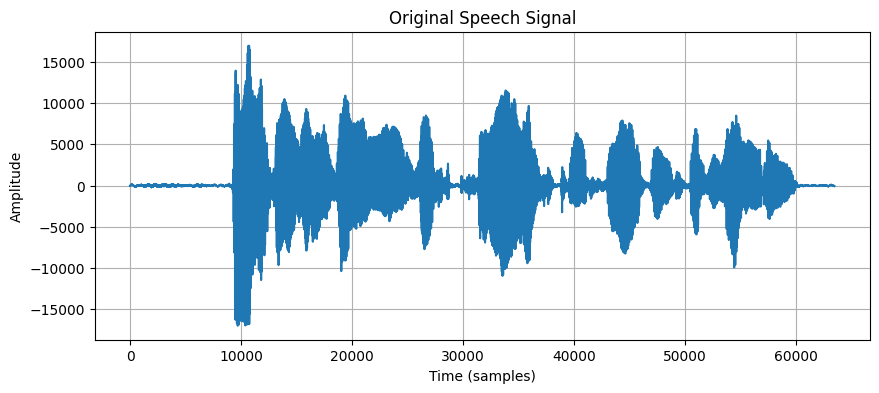

In [9]:
plt.figure(figsize=(10, 4))
plt.plot(audio_data)
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.title("Original Speech Signal")
plt.grid(True)
plt.show()

In [10]:
sampling_rates = [8000, 12000, 14000]

# Sample the speech signal at each sampling rate
sampled_signals = []
for sr in sampling_rates:
    # Calculate the sampling period
    T = 1 / sr

    # Sample the signal
    sampled_signal = audio_data[::int(sample_rate / sr)]
    sampled_signals.append(sampled_signal)

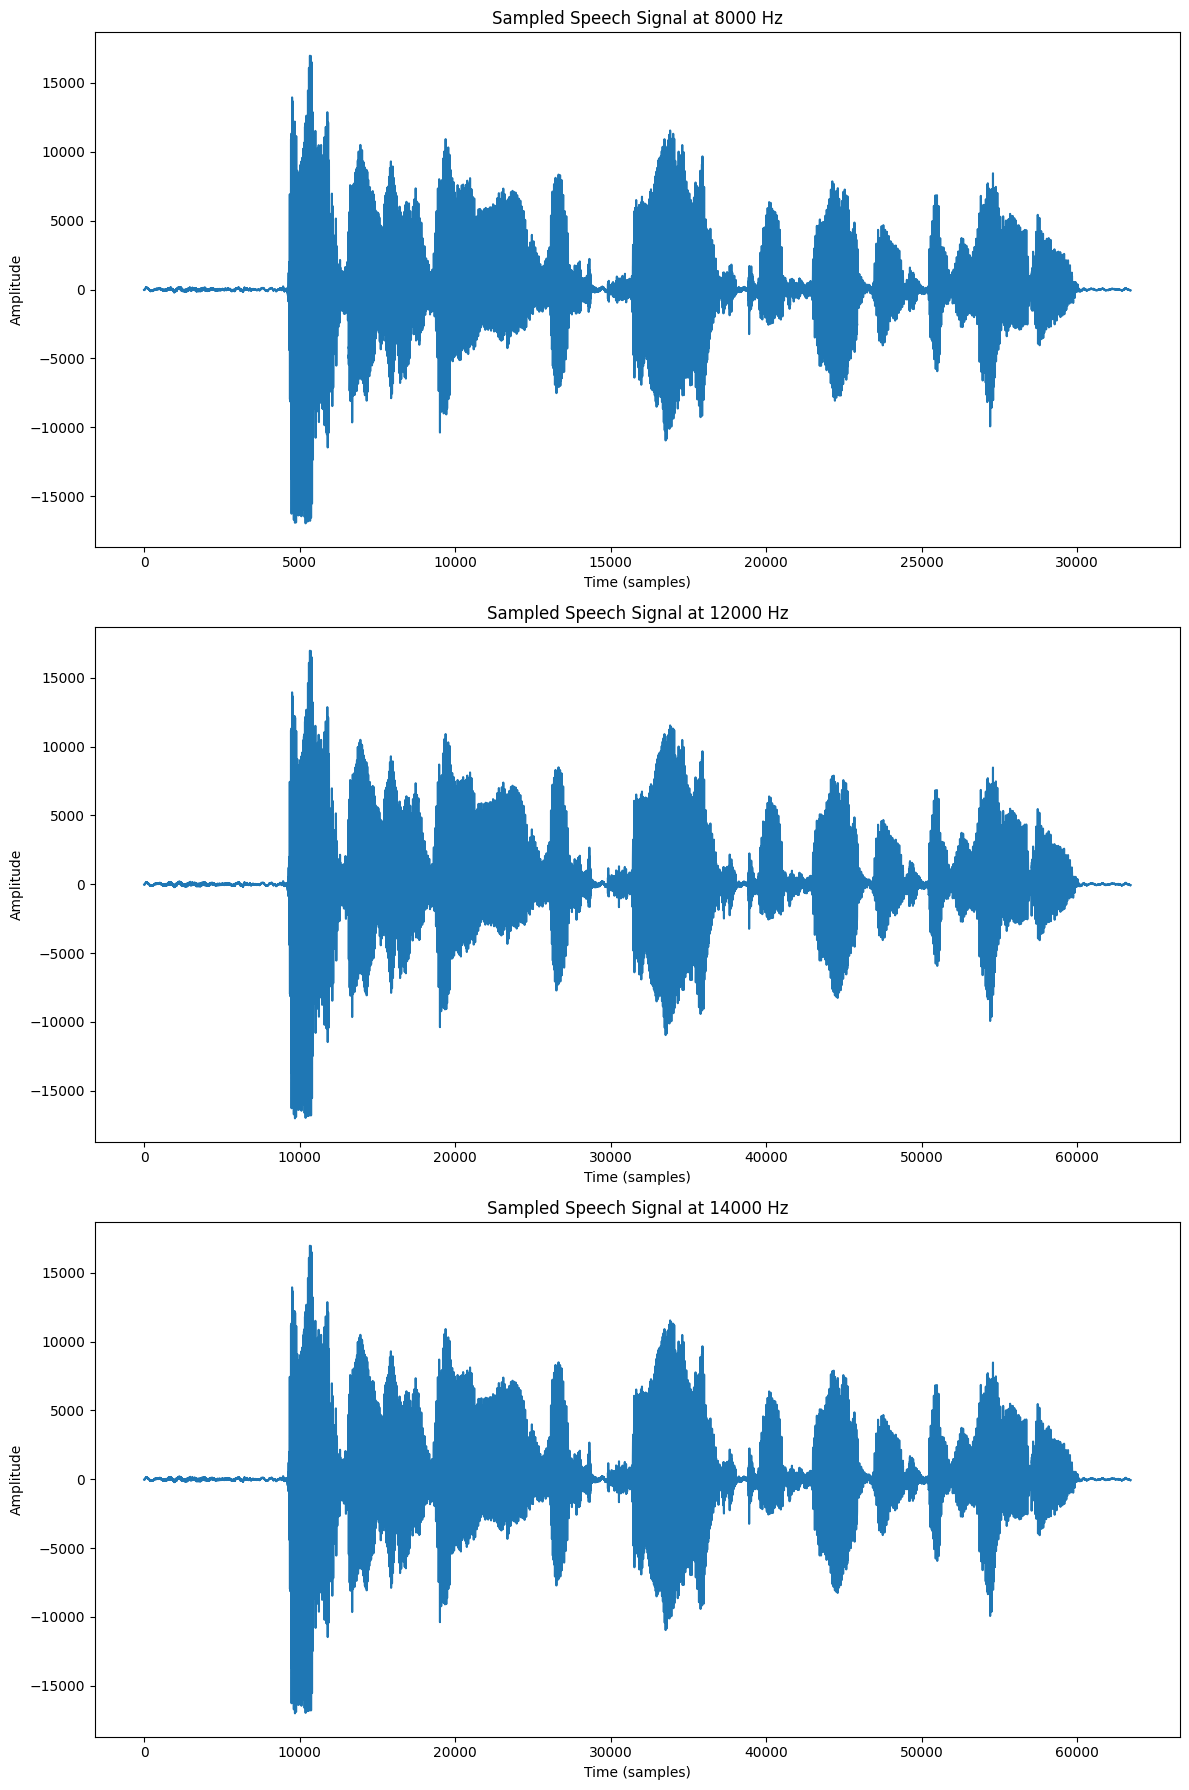

In [11]:
# Plot the sampled signals
fig, axs = plt.subplots(len(sampling_rates), figsize=(12, 6 * len(sampling_rates)))
for i, (sr, signal) in enumerate(zip(sampling_rates, sampled_signals)):
    axs[i].plot(signal)
    axs[i].set_xlabel('Time (samples)')
    axs[i].set_ylabel('Amplitude')
    axs[i].set_title(f'Sampled Speech Signal at {sr} Hz')
plt.tight_layout()
plt.show()

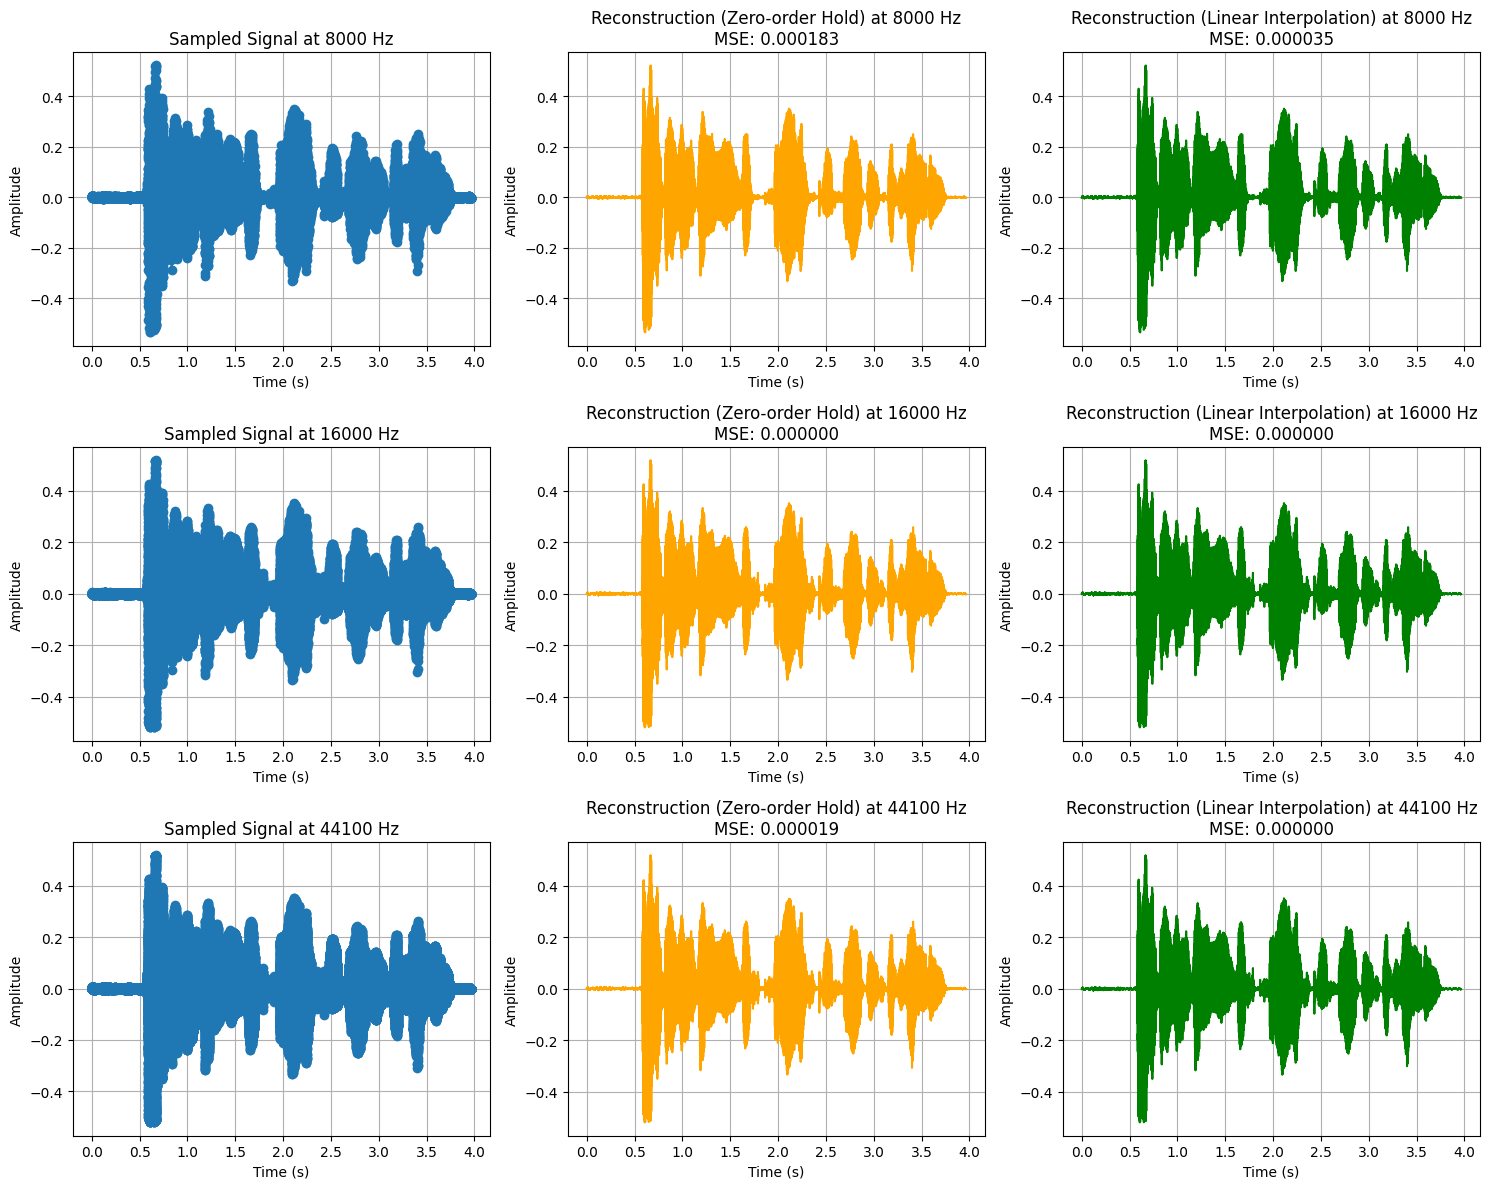

MSE for 8000 Hz sampling rate - Zero-Order Hold: 0.000182761286851, Linear Interpolation: 0.000035210204062
MSE for 16000 Hz sampling rate - Zero-Order Hold: 0.000000000000000, Linear Interpolation: 0.000000000000000
MSE for 44100 Hz sampling rate - Zero-Order Hold: 0.000018675671527, Linear Interpolation: 0.000000084964693


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
from scipy.signal import resample
from scipy.interpolate import interp1d

# Load the original wav file (replace 'your_speech_file.wav' with your actual file)
file_path = '/content/1284-1181-0000.wav'  # Path to the speech signal
original_signal, sr = librosa.load(file_path, sr=None)  # Load the original speech signal with its sample rate

# Define the Mean Squared Error (MSE) function
def calculate_mse(original, reconstructed):
    return np.mean((original[:len(reconstructed)] - reconstructed) ** 2)

# Storage for MSE values
mse_zero_order_hold = []
mse_linear_interpolation = []

# Time for the original signal
duration = len(original_signal) / sr
t = np.linspace(0, duration, len(original_signal), endpoint=False)

# Sampling rates to test
sampling_rates = [8000, 16000, 44100]

plt.figure(figsize=(15, 12))

for i, new_sr in enumerate(sampling_rates):
    # Resample the signal to new sampling rate
    if new_sr != sr:
        num_samples = int(len(original_signal) * new_sr / sr)
        sampled_signal = resample(original_signal, num_samples)
        t_new = np.linspace(0, duration, num_samples, endpoint=False)
    else:
        sampled_signal = original_signal
        t_new = t

    # Zero-order Hold (Nearest-neighbor interpolation)
    t_zh = np.linspace(0, duration, len(original_signal), endpoint=False)
    nearest_interp = np.floor(np.arange(len(t_zh)) * len(t_new) / len(t_zh)).astype(int)
    zero_order_hold = sampled_signal[nearest_interp]

    # Linear interpolation
    linear_interp_func = interp1d(t_new, sampled_signal, kind='linear', fill_value="extrapolate")
    linear_interp = linear_interp_func(t_zh)

    # Calculate MSE for Zero-Order Hold
    mse_zh = calculate_mse(original_signal, zero_order_hold)
    mse_zero_order_hold.append(mse_zh)

    # Calculate MSE for Linear Interpolation
    mse_li = calculate_mse(original_signal, linear_interp)
    mse_linear_interpolation.append(mse_li)

    # Plot the sampled signals
    plt.subplot(len(sampling_rates), 3, i * 3 + 1)
    plt.plot(t_new, sampled_signal, 'o-', label='Sampled')
    plt.title(f"Sampled Signal at {new_sr} Hz")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid(True)

    # Plot Zero-Order Hold Reconstruction
    plt.subplot(len(sampling_rates), 3, i * 3 + 2)
    plt.plot(t_zh, zero_order_hold, label="Zero-order Hold", color='orange')
    plt.title(f"Reconstruction (Zero-order Hold) at {new_sr} Hz\nMSE: {mse_zh:.6f}")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid(True)

    # Plot Linear Interpolation Reconstruction
    plt.subplot(len(sampling_rates), 3, i * 3 + 3)
    plt.plot(t_zh, linear_interp, label='Linear Interpolation', color='green')
    plt.title(f"Reconstruction (Linear Interpolation) at {new_sr} Hz\nMSE: {mse_li:.6f}")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# Print MSE values for each method and sampling rate
for sr_new, mse_zh, mse_li in zip(sampling_rates, mse_zero_order_hold, mse_linear_interpolation):
    print(f"MSE for {sr_new} Hz sampling rate - Zero-Order Hold: {mse_zh:.15f}, Linear Interpolation: {mse_li:.15f}")


The Mean Squared Error (MSE) values show that Linear Interpolation consistently outperforms Zero-Order Hold across all sampling rates, with significantly lower error values. At 16 kHz, both methods perfectly reconstruct the signal with zero error, as no downsampling was applied. For 8 kHz and 44.1 kHz, Zero-Order Hold introduces noticeable errors, especially at lower rates, due to its step-wise approximation. In contrast, Linear Interpolation provides a much smoother and accurate reconstruction, especially at higher sampling rates.

The MSE is 0 for 16 kHz because the signal was originally sampled at 16 kHz, and no downsampling or loss of data occurred at that rate.

(a) Generate a synthetic speech signal using the source-filter model.
(i) Create a source signal (e.g., a glottal pulse train for voiced sounds
or white noise for unvoiced sounds).
(ii) Apply a filter that models the vocal tract, represented by an all-pole
filter or an FIR filter with formants (resonances of the vocal tract).

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Sampling frequency (samples per second)
fs = 16000  # Common sample rate for speech processing

# Duration of the signal (seconds)
duration = 1.0  # 1 second

# Time array
t = np.arange(0, duration, 1/fs)


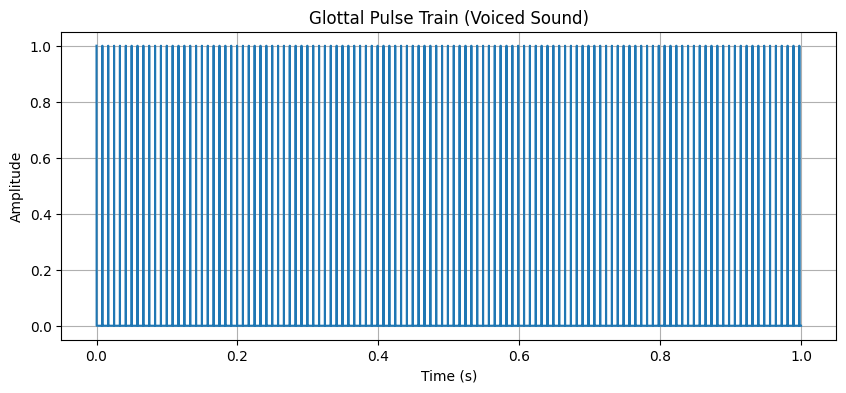

In [25]:
# Define the fundamental frequency of the voiced sound (e.g., 120 Hz)
f0 = 120

# Generate the glottal pulse train (periodic impulses)
glottal_pulse_train = np.zeros_like(t)
glottal_pulse_train[::int(fs/f0)] = 1  # Impulses at every period corresponding to the fundamental frequency

# Plot the glottal pulse train
plt.figure(figsize=(10, 4))
plt.plot(t, glottal_pulse_train)
plt.title('Glottal Pulse Train (Voiced Sound)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


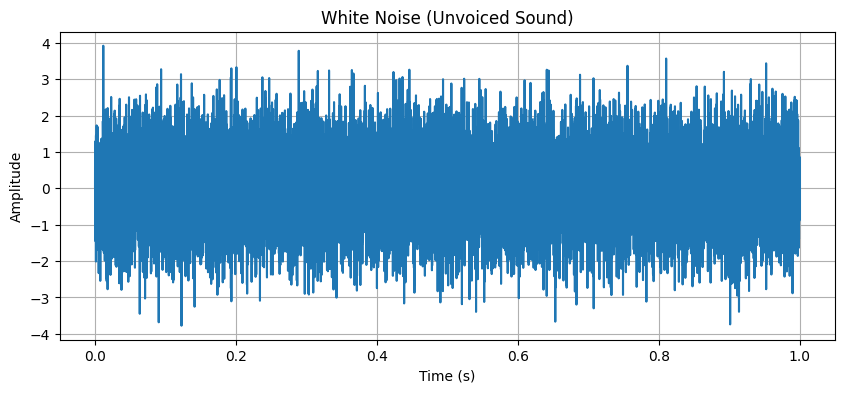

In [26]:
# Generate white noise for unvoiced sound
white_noise = np.random.normal(0, 1, len(t))

# Plot the white noise
plt.figure(figsize=(10, 4))
plt.plot(t, white_noise)
plt.title('White Noise (Unvoiced Sound)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')# Zoom into the first 50 ms
plt.grid(True)
plt.show()


In [27]:
from scipy.signal import lfilter
import numpy as np

# Define formant frequencies (in Hz) for a vowel (e.g., "a")
formants = [500, 1500, 2500]

# Bandwidths for the formants (in Hz)
bandwidths = [100, 100, 200]

def formant_filter(formants, bandwidths, fs):
    """
    Creates an all-pole filter for vocal tract modeling based on formants and bandwidths.
    """
    A = np.array([1.0])  # The filter's numerator (all-pole, so no zeros)

    # Loop through each formant and bandwidth
    for (f, b) in zip(formants, bandwidths):
        # Convert frequencies to radians per sample
        r = np.exp(-np.pi * b / fs)  # Pole radius
        theta = 2 * np.pi * f / fs   # Pole angle

        # Form the conjugate poles
        poles = np.array([1, -2 * r * np.cos(theta), r ** 2])

        # Convolve the filter coefficients
        A = np.convolve(A, poles)

    return A

# Get the filter coefficients for the vocal tract
A = formant_filter(formants, bandwidths, fs)

# Display the filter coefficients
print("Filter Coefficients (Denominator):", A)


Filter Coefficients (Denominator): [  1.          -4.62238857   9.78076683 -12.10791339   9.25239426
  -4.14671359   0.854636  ]


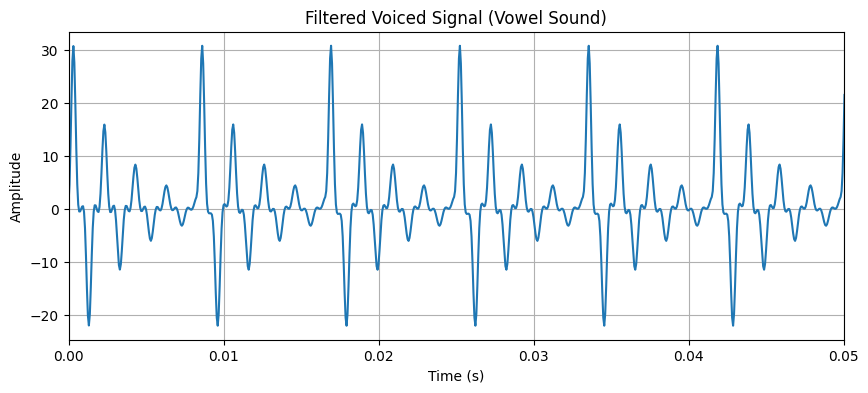

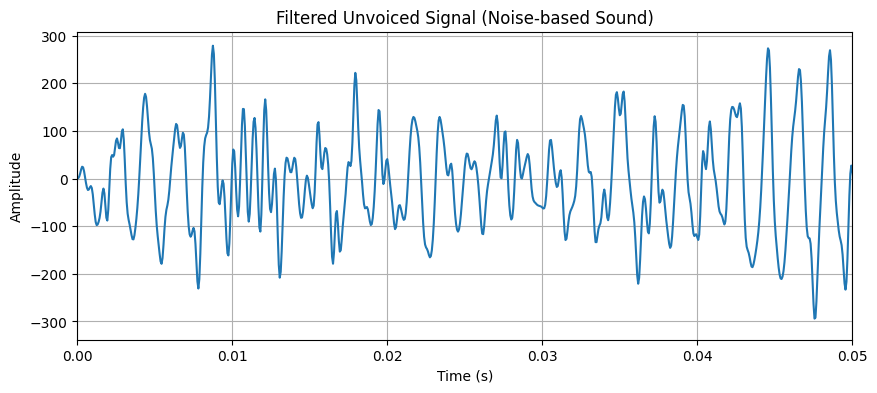

In [28]:
# Apply the filter to the glottal pulse train (voiced sound)
filtered_voiced = lfilter([1.0], A, glottal_pulse_train)

# Apply the filter to the white noise (unvoiced sound)
filtered_unvoiced = lfilter([1.0], A, white_noise)

# Plot the filtered voiced signal
plt.figure(figsize=(10, 4))
plt.plot(t, filtered_voiced)
plt.title('Filtered Voiced Signal (Vowel Sound)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.xlim(0, 0.05)  # Zoom into the first 50 ms
plt.grid(True)
plt.show()

# Plot the filtered unvoiced signal
plt.figure(figsize=(10, 4))
plt.plot(t, filtered_unvoiced)
plt.title('Filtered Unvoiced Signal (Noise-based Sound)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.xlim(0, 0.05)  # Zoom into the first 50 ms
plt.grid(True)
plt.show()


(c) Sample the speech signal generated in the above task at different sampling
rates (e.g., 8 kHz, 16 kHz, 44.1 kHz).

In [29]:
from scipy.signal import resample

# Function to resample the signal
def resample_signal(signal, original_fs, target_fs):
    num_samples = int(len(signal) * target_fs / original_fs)  # Calculate new number of samples
    resampled_signal = resample(signal, num_samples)  # Resample the signal
    return resampled_signal, num_samples


In [30]:
# Original sampling rate
original_fs = 16000

# Resample the signal to 8 kHz
resampled_8k, num_samples_8k = resample_signal(filtered_voiced, original_fs, 8000)

# Resample the signal to 16 kHz (no change needed, but resampling demonstrates the process)
resampled_16k, num_samples_16k = resample_signal(filtered_voiced, original_fs, 16000)

# Resample the signal to 44.1 kHz
resampled_44k, num_samples_44k = resample_signal(filtered_voiced, original_fs, 44100)


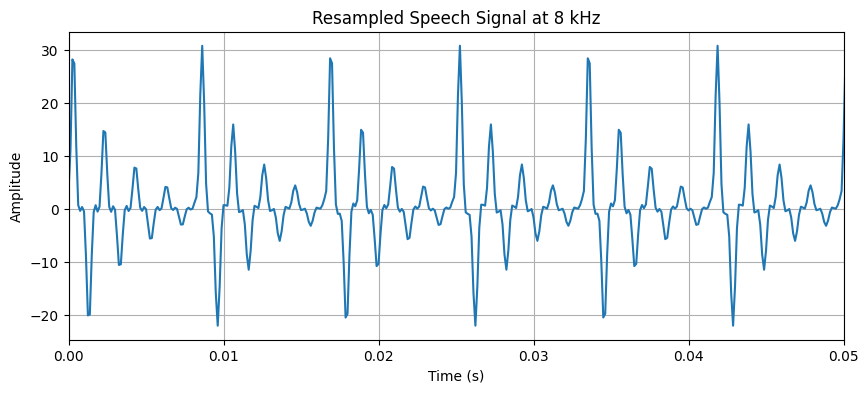

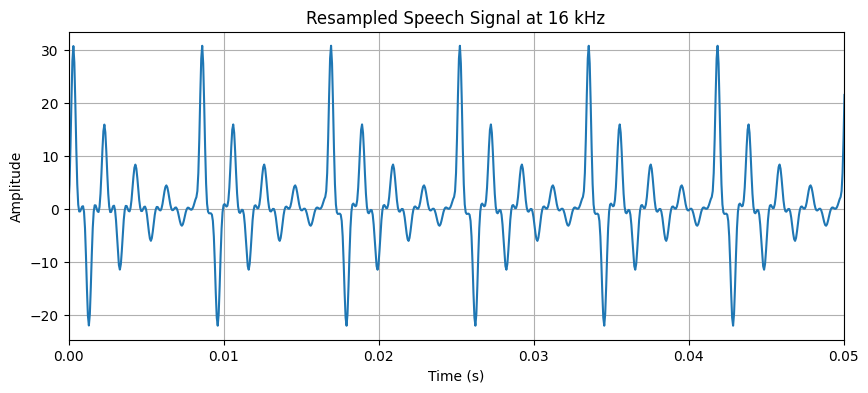

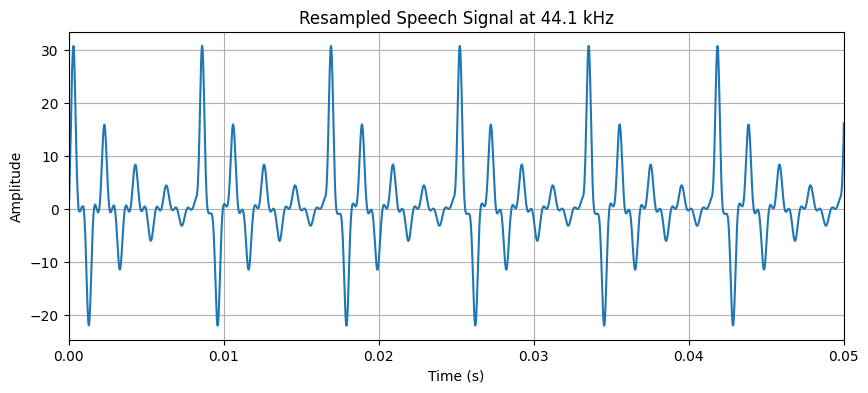

In [31]:
# Plot the resampled signal at 8 kHz
t_8k = np.linspace(0, duration, num_samples_8k, endpoint=False)
plt.figure(figsize=(10, 4))
plt.plot(t_8k, resampled_8k)
plt.title('Resampled Speech Signal at 8 kHz')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.xlim(0, 0.05)  # Zoom into the first 50 ms
plt.grid(True)
plt.show()

# Plot the resampled signal at 16 kHz (no resampling applied)
t_16k = np.linspace(0, duration, num_samples_16k, endpoint=False)
plt.figure(figsize=(10, 4))
plt.plot(t_16k, resampled_16k)
plt.title('Resampled Speech Signal at 16 kHz')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.xlim(0, 0.05)  # Zoom into the first 50 ms
plt.grid(True)
plt.show()

# Plot the resampled signal at 44.1 kHz
t_44k = np.linspace(0, duration, num_samples_44k, endpoint=False)
plt.figure(figsize=(10, 4))
plt.plot(t_44k, resampled_44k)
plt.title('Resampled Speech Signal at 44.1 kHz')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.xlim(0, 0.05)  # Zoom into the first 50 ms
plt.grid(True)
plt.show()


(d) Reconstruct the signal using a suitable interpolation method (e.g., zero-
order hold, linear interpolation).

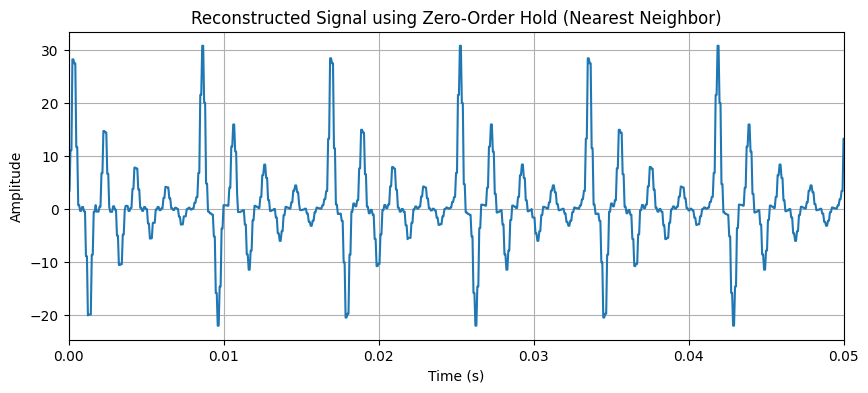

In [32]:
from scipy.interpolate import interp1d

# Time arrays for 8 kHz and 16 kHz
t_8k = np.linspace(0, duration, num_samples_8k, endpoint=False)
t_16k = np.linspace(0, duration, len(t), endpoint=False)

# Zero-Order Hold Interpolation (Nearest)
zero_order_hold = interp1d(t_8k, resampled_8k, kind='nearest', fill_value="extrapolate")

# Reconstruct the signal at 16 kHz using Zero-Order Hold
reconstructed_zo = zero_order_hold(t_16k)

# Plot the reconstructed signal using Zero-Order Hold
plt.figure(figsize=(10, 4))
plt.plot(t_16k, reconstructed_zo)
plt.title('Reconstructed Signal using Zero-Order Hold (Nearest Neighbor)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.xlim(0, 0.05)  # Zoom into the first 50 ms
plt.grid(True)
plt.show()


Zero-Order Hold (nearest neighbor) interpolation to reconstruct a downsampled signal from 8 kHz back to the original 16 kHz sampling rate. It holds each 8 kHz sample constant until the next one, creating a step-like reconstruction.

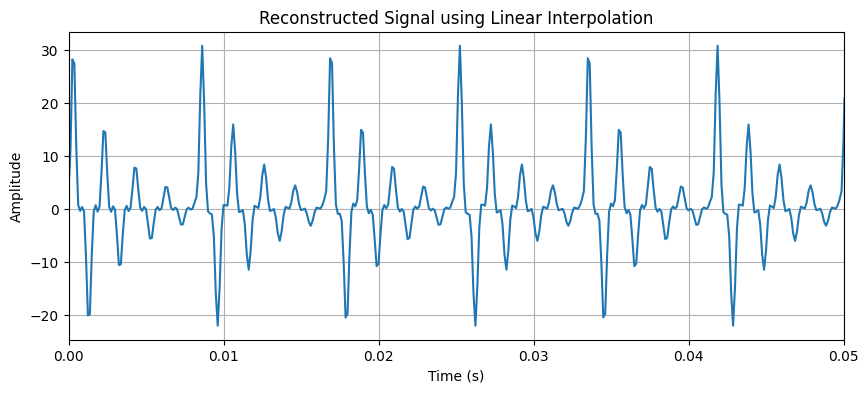

In [33]:
# Linear Interpolation
linear_interp = interp1d(t_8k, resampled_8k, kind='linear', fill_value="extrapolate")

# Reconstruct the signal at 16 kHz using Linear Interpolation
reconstructed_linear = linear_interp(t_16k)

# Plot the reconstructed signal using Linear Interpolation
plt.figure(figsize=(10, 4))
plt.plot(t_16k, reconstructed_linear)
plt.title('Reconstructed Signal using Linear Interpolation')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.xlim(0, 0.05)  # Zoom into the first 50 ms
plt.grid(True)
plt.show()


 linear interpolation to reconstruct a signal that was downsampled to 8 kHz, returning it to the original 16 kHz sampling rate. It estimates new values for the 16 kHz time points by linearly connecting the adjacent 8 kHz sample points.

(e) Compute the Mean Squared Error (MSE) between the original and re-
constructed speech signals.

In [34]:
# Function to compute Mean Squared Error
def compute_mse(original, reconstructed):
    mse = np.mean((original - reconstructed) ** 2)
    return mse

# Compute MSE for Zero-Order Hold
mse_zo = compute_mse(filtered_voiced, reconstructed_zo)
print(f"Mean Squared Error (Zero-Order Hold): {mse_zo:.6f}")

# Compute MSE for Linear Interpolation
mse_linear = compute_mse(filtered_voiced, reconstructed_linear)
print(f"Mean Squared Error (Linear Interpolation): {mse_linear:.6f}")


Mean Squared Error (Zero-Order Hold): 2.881127
Mean Squared Error (Linear Interpolation): 0.206196


# Zero-Order Hold
MSE Result: 2.881127

The relatively higher MSE value means that the Zero-Order Hold interpolation method did not approximate the original signal well
Zero-Order Hold is not ideal for reconstructing continuous signals like speech because it introduces discontinuities and results in a high MSE.

# Linear Interpolation
MSE Result: 0.206196

The much lower MSE value here indicates that Linear Interpolation does a far better job at approximating the original signal.
Linear Interpolation is a much better approach for reconstructing speech signals, as it maintains the smoothness of the original signal and produces lower MSE.

